# Phylo - Matplotlib

<Figure size 800x600 with 0 Axes>

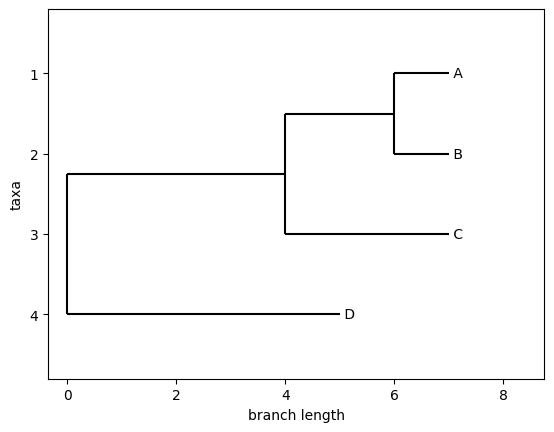

In [7]:
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import os

# Define the Newick string
newick_str = "(((A:1,B:1):2,C:3):4,D:5);"

# Parse the Newick string
tree = Phylo.read(StringIO(newick_str), "newick")

# Plot the tree
plt.figure(figsize=(8, 6))
Phylo.draw(tree)
plt.show()


Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050_ClonalFamily_1.abRT.nk.png


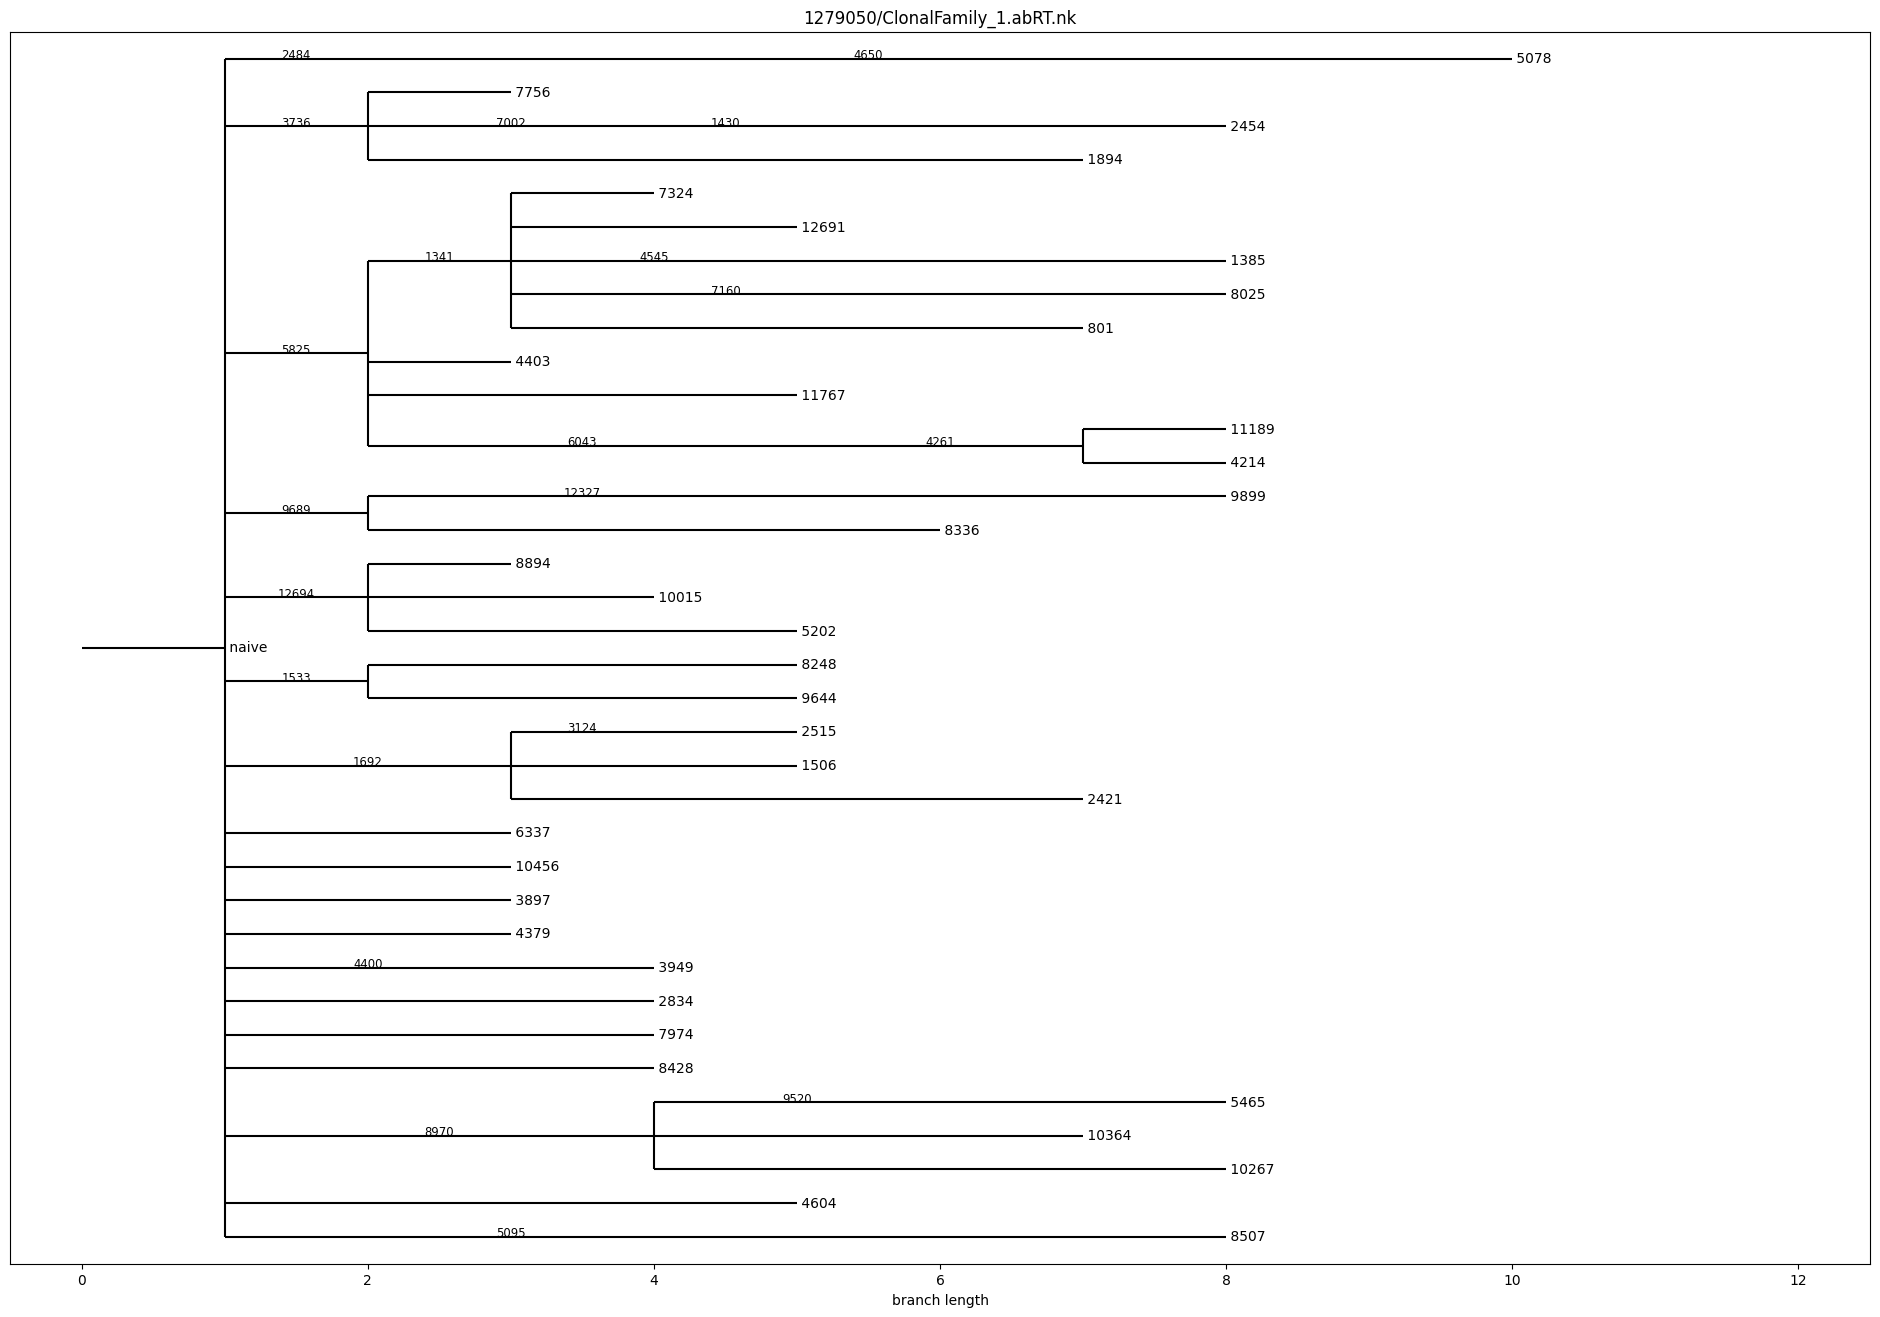

In [8]:
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import os

def plot_newick_tree_from_file(file_path, output_dir=None):
    """
    Parse a Newick file, plot the phylogenetic tree, and optionally save it to a file.
    
    Args:
        file_path (str): Path to the .nk file containing the Newick string.
        output_dir (str): Directory where the plot should be saved. If None, the plot will not be saved.
    
    Returns:
        None
    """
    try:
        # Read the Newick file
        with open(file_path, 'r') as file:
            newick_str = file.read().strip()
        
        # Extract family name
        split_file = file_path.split('/')
        family_name = f"{split_file[-2]}/{split_file[-1]}"
        family_file_name = family_name.replace("/", "_")  # Convert path-like name to a valid filename
        
        # Parse the Newick string
        tree = Phylo.read(StringIO(newick_str), "newick")
        
        # Plot the tree
        fig = plt.figure(figsize=(24, 16))
        ax = fig.add_subplot(1, 1, 1)
        Phylo.draw(tree, do_show=False, axes=ax)
        ax.set_ylabel("") 
        ax.set_yticks([])
        ax.set_title(family_name)

        # Save the plot if output_dir is provided
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists
            output_file = os.path.join(output_dir, f"{family_file_name}.png")
            fig.savefig(output_file, dpi=300)  # Save the plot with high resolution
            print(f"Tree plot saved to {output_file}")

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
file = '/home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/runs/1279050/ClonalFamily_1.abRT.nk'
output_directory = "/home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots"
plot_newick_tree_from_file(file, output_dir=output_directory)


In [ ]:
def process_all_newick_files(base_dir, output_base_dir, max_num):
    """
    Process all .nk files in the subdirectories of a base directory.
    
    Args:
        base_dir (str): Path to the base directory containing subdirectories with .nk files.
        output_base_dir (str): Path to the base directory where plots will be saved.
        max_num (int): Number of directories to parse
    
    Returns:
        None
    """
    try:
        # Iterate through each subdirectory of base_dir
        counter = 0
        for root, _, files in os.walk(base_dir):
            if counter >= max_num:
                break
            for file in files:
                if file.endswith(".nk"):
                    # Construct the full path to the input .nk file
                    file_path = os.path.join(root, file)
                    
                    # Determine relative path from base_dir to the file
                    relative_path = os.path.relpath(file_path, base_dir)
                    
                    # Construct the corresponding output directory
                    output_dir = os.path.join(output_base_dir, os.path.dirname(relative_path))
                    
                    # Call the plot function
                    plot_newick_tree_from_file(file_path, output_dir)
    
    except Exception as e:
        print(f"An error occurred while processing files: {e}")

# Example usage
base_directory = "/home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/runs"
output_directory = "/home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots"
process_all_newick_files(base_directory, output_directory, 1)


ClonalFamily_5.abRT.nk.csv
ClonalFamily_7.abRT.nk.csv
ClonalFamily_6.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_6.abRT.nk.png


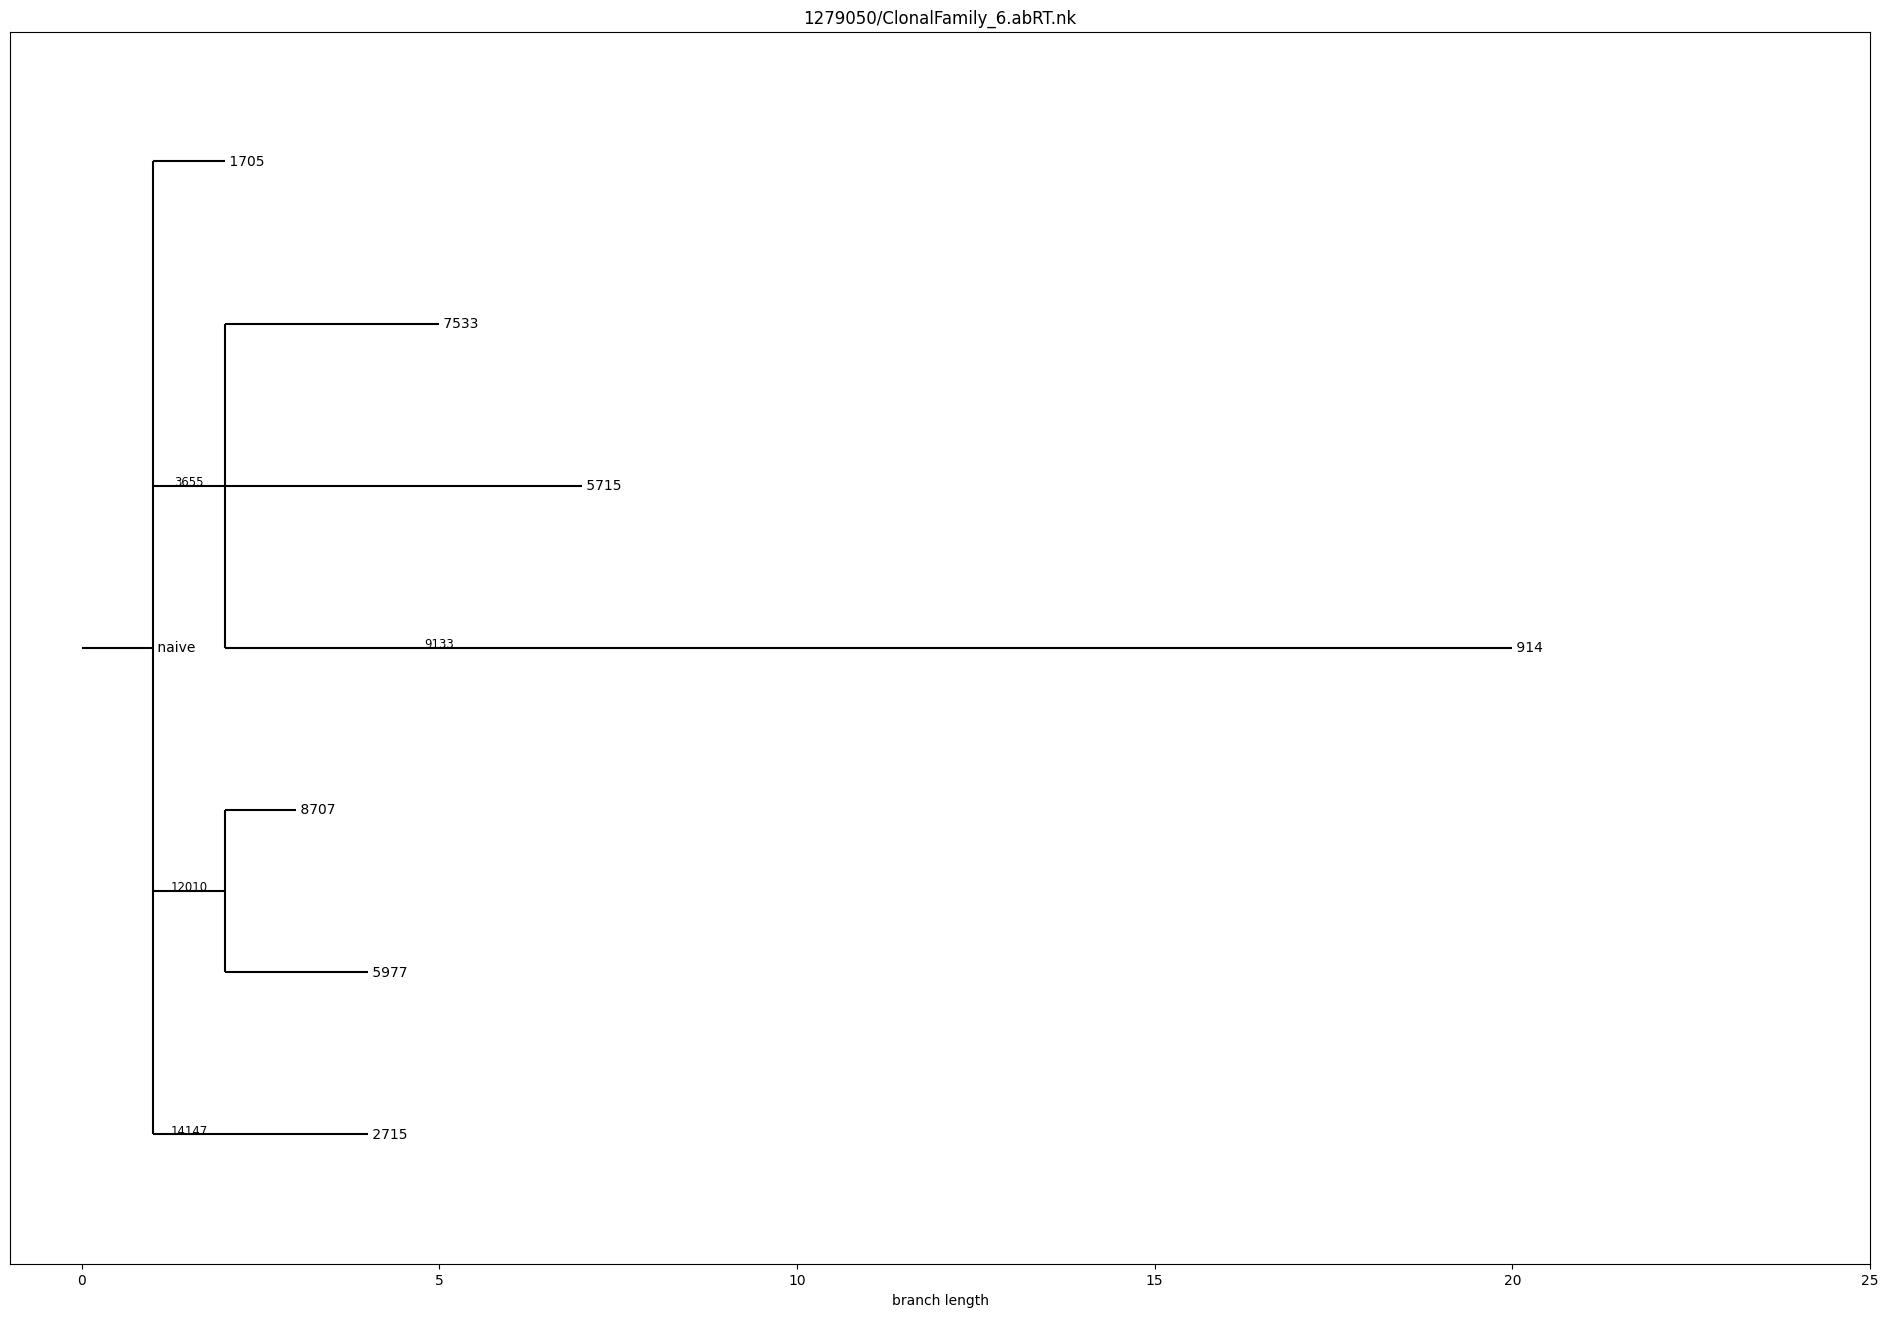

ClonalFamily_2.abRT.nk.csv
ClonalFamily_3.abRT.nk.csv
ClonalFamily_5.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_5.abRT.nk.png


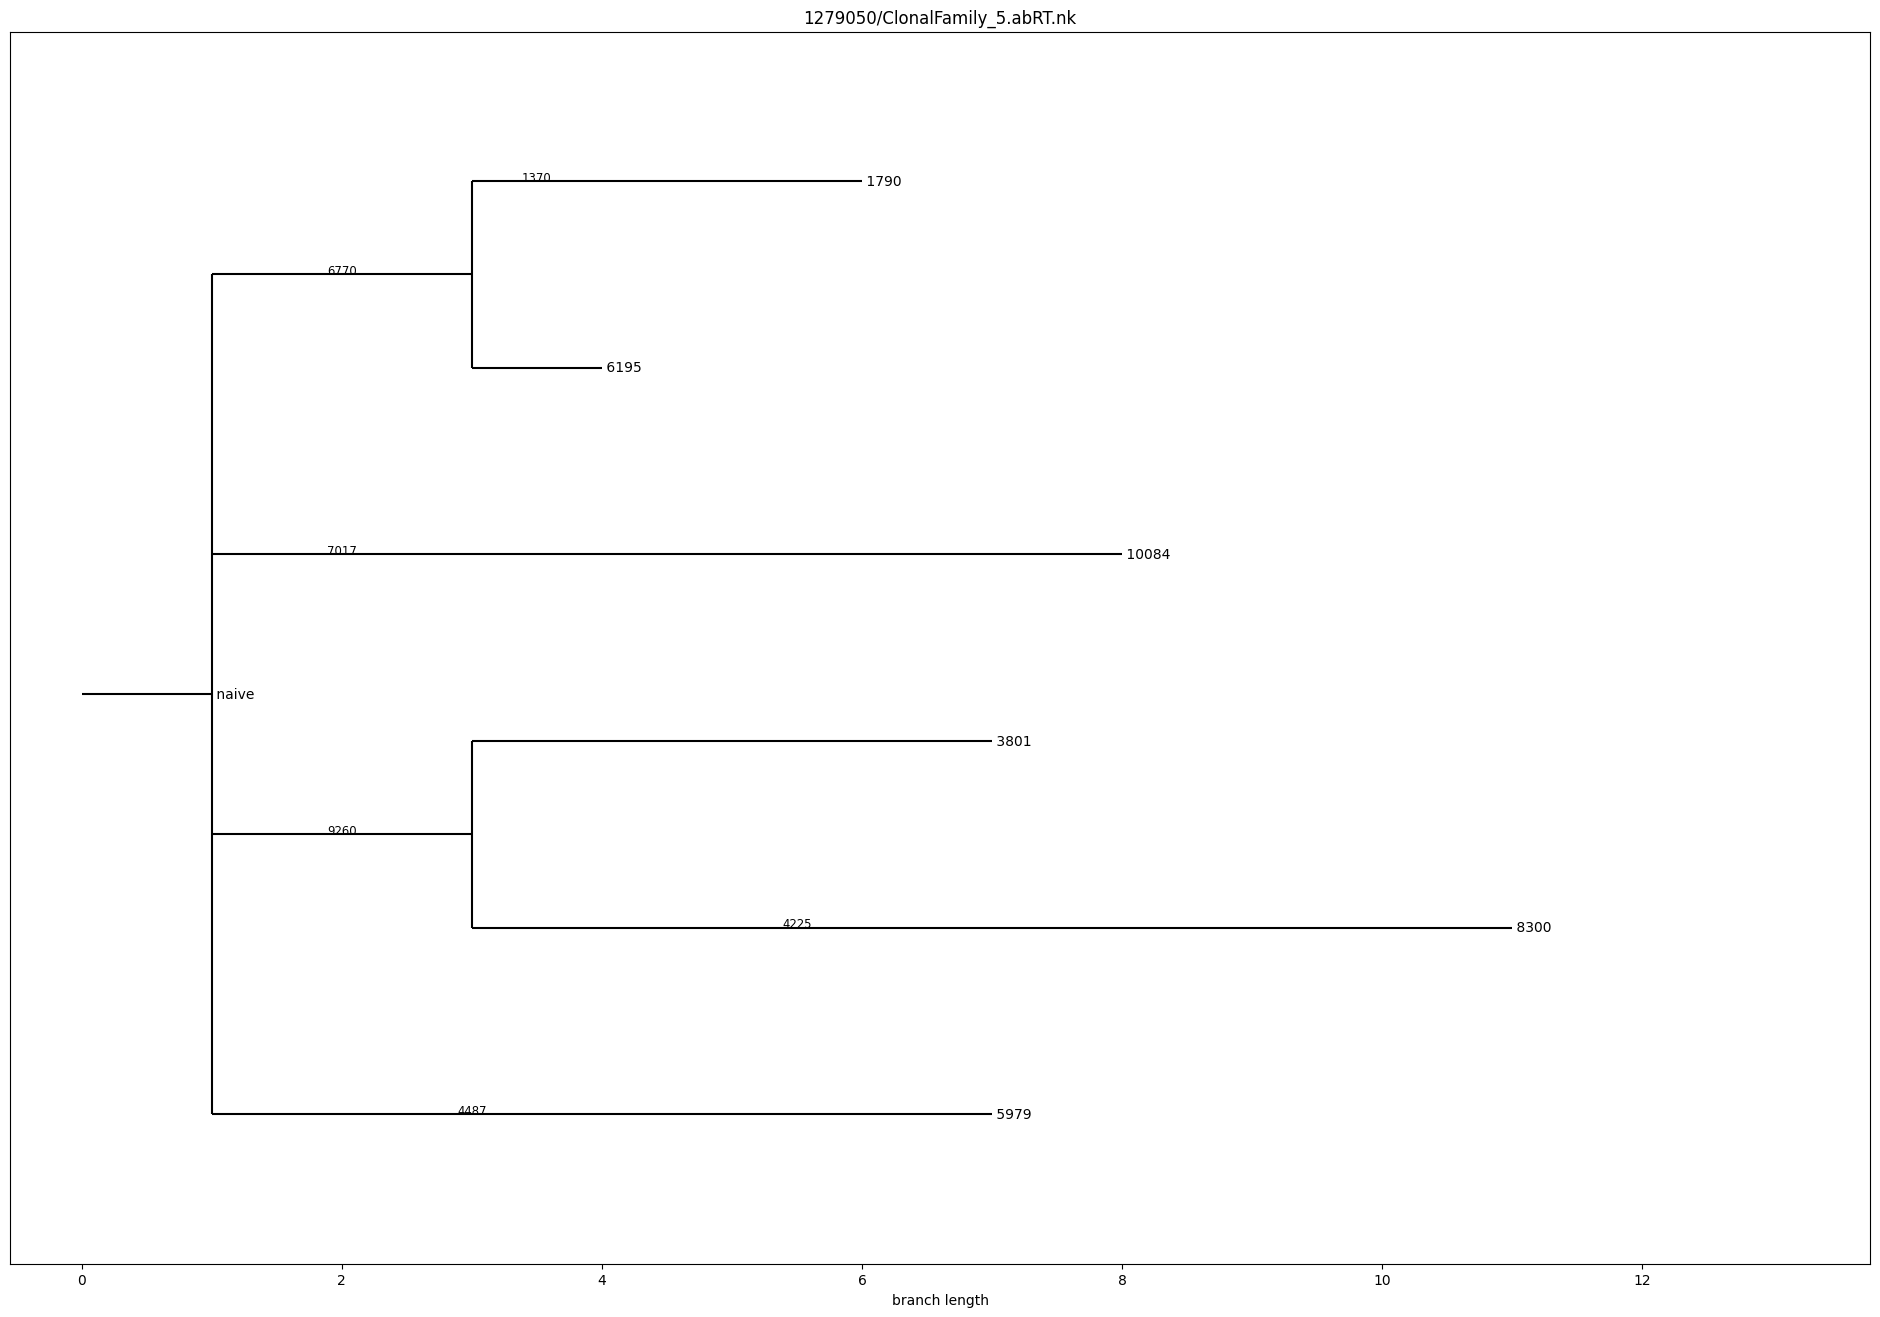

ClonalFamily_3.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_3.abRT.nk.png


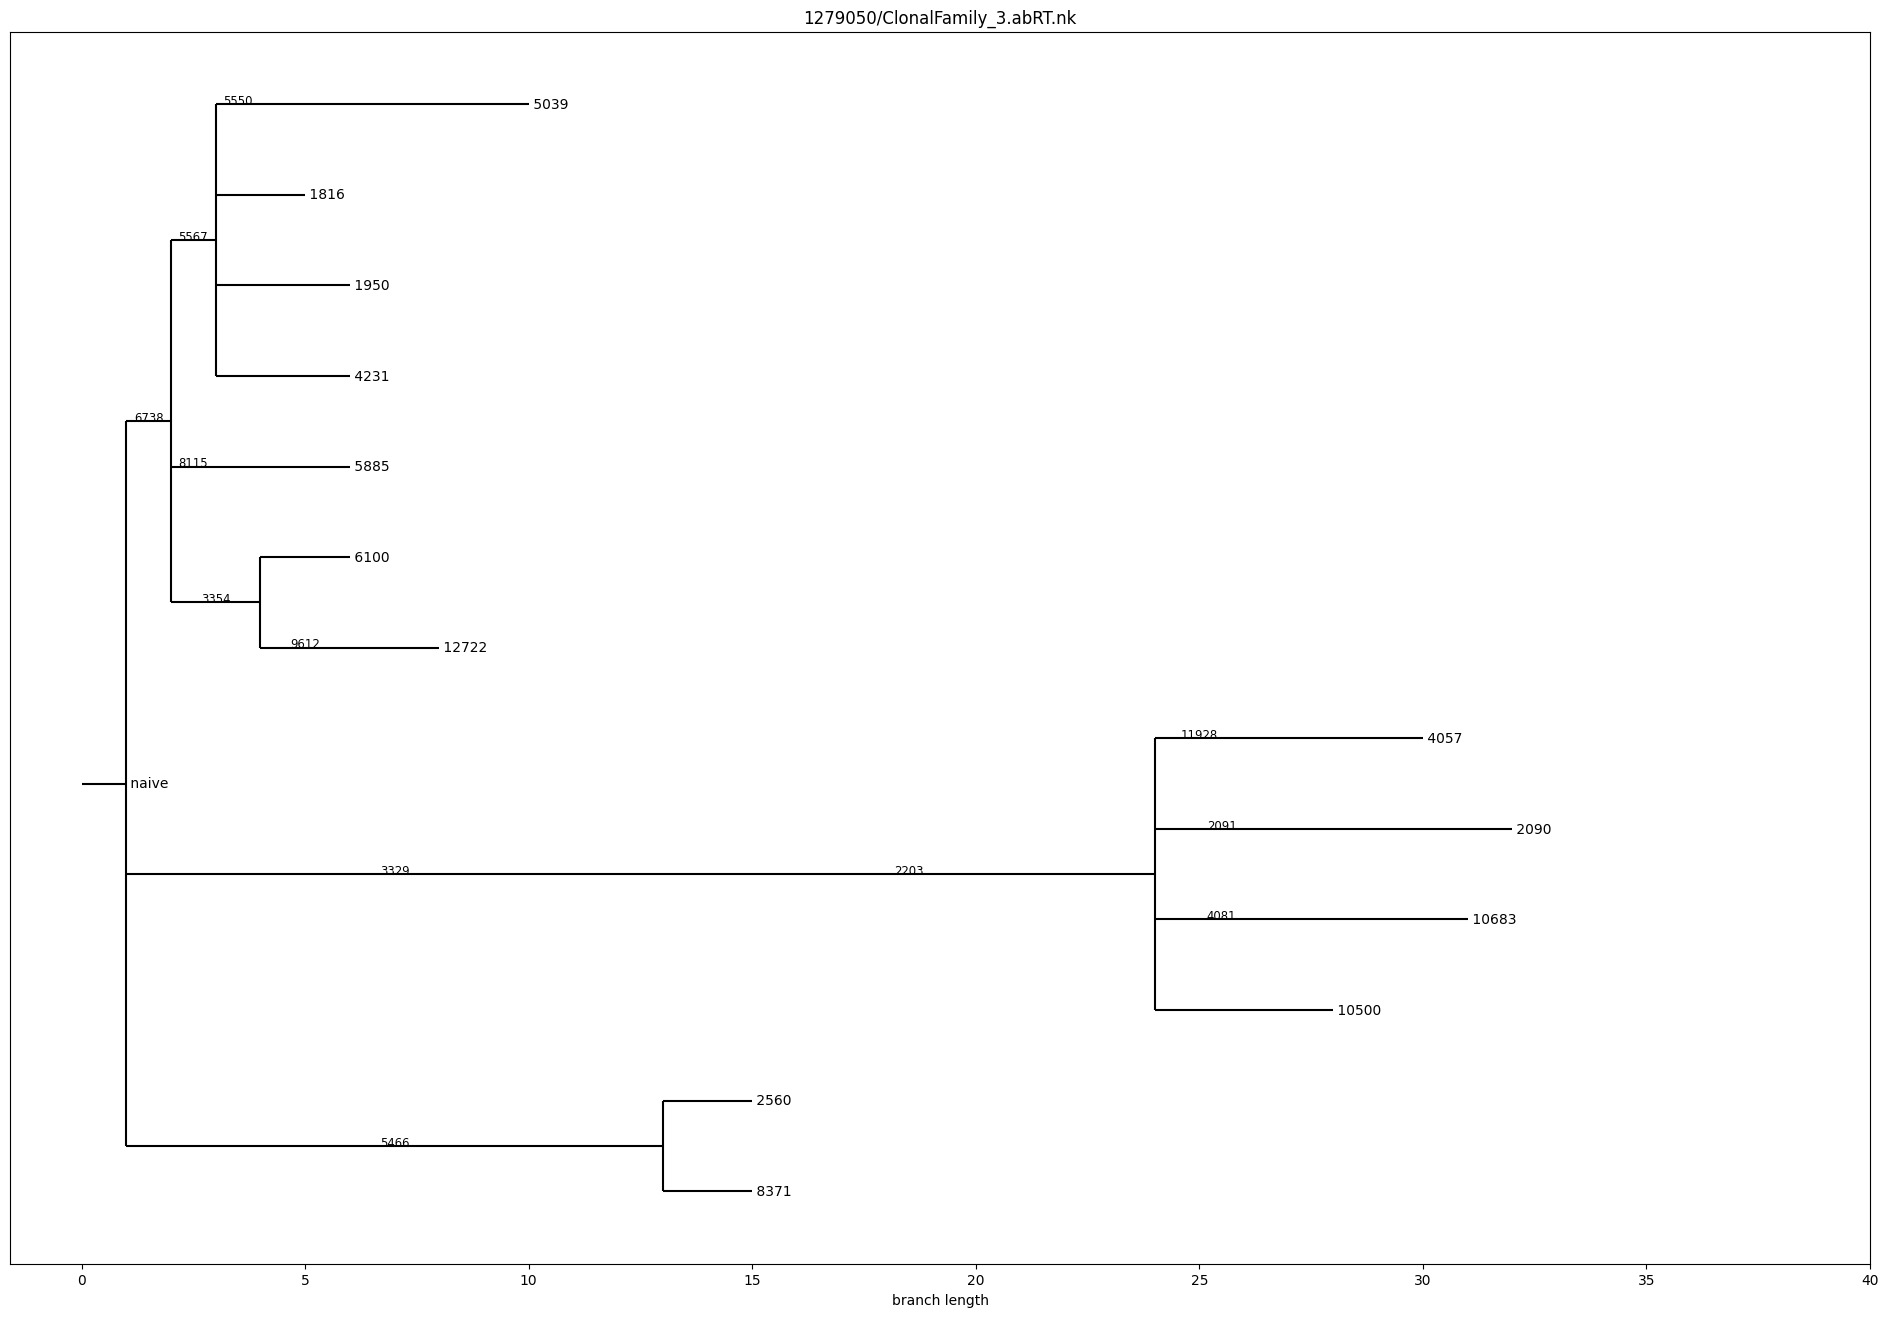

ClonalFamily_8.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_8.abRT.nk.png


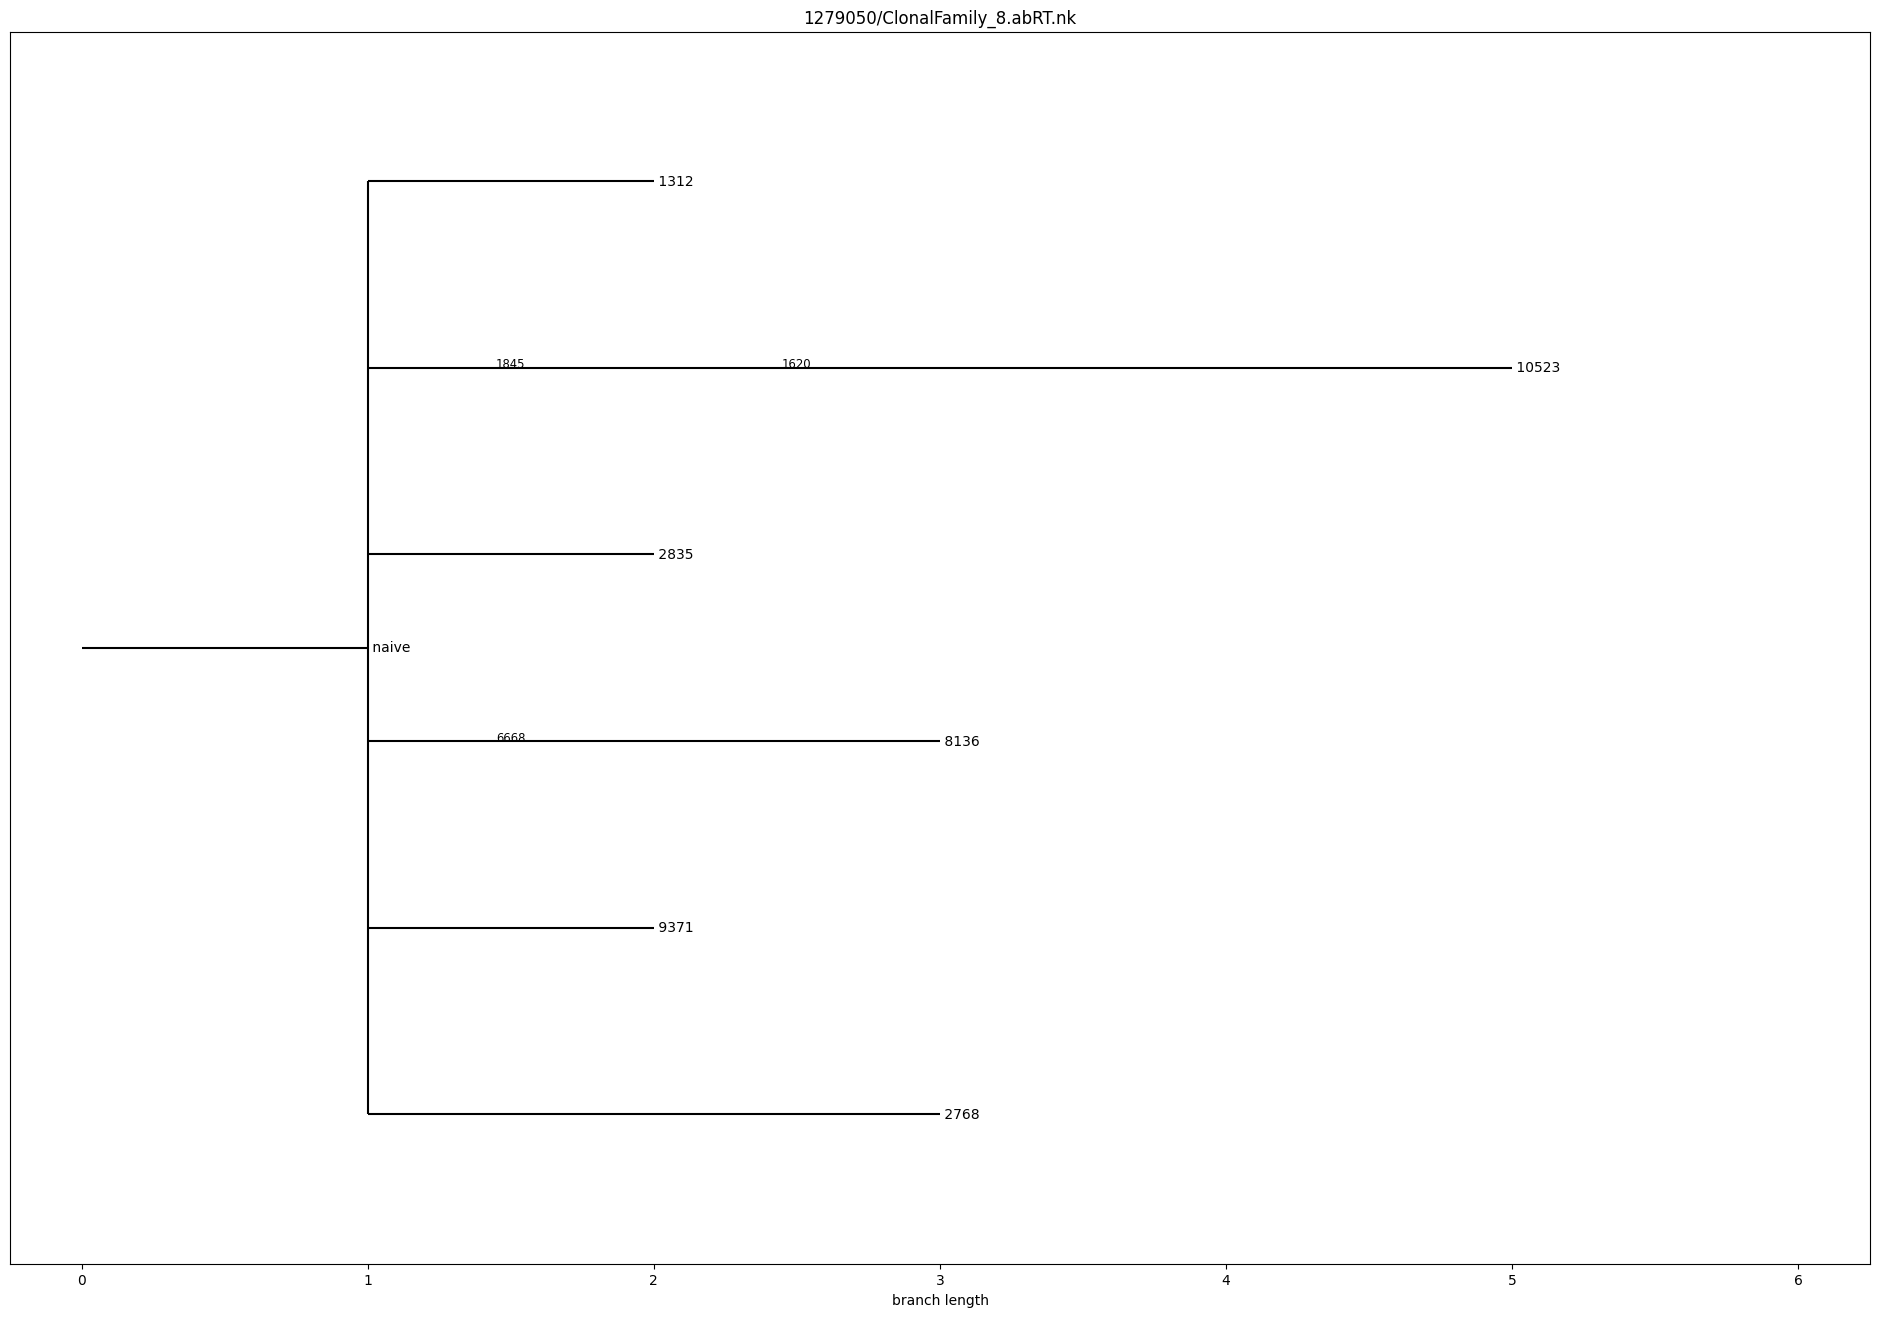

ClonalFamily_2.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_2.abRT.nk.png


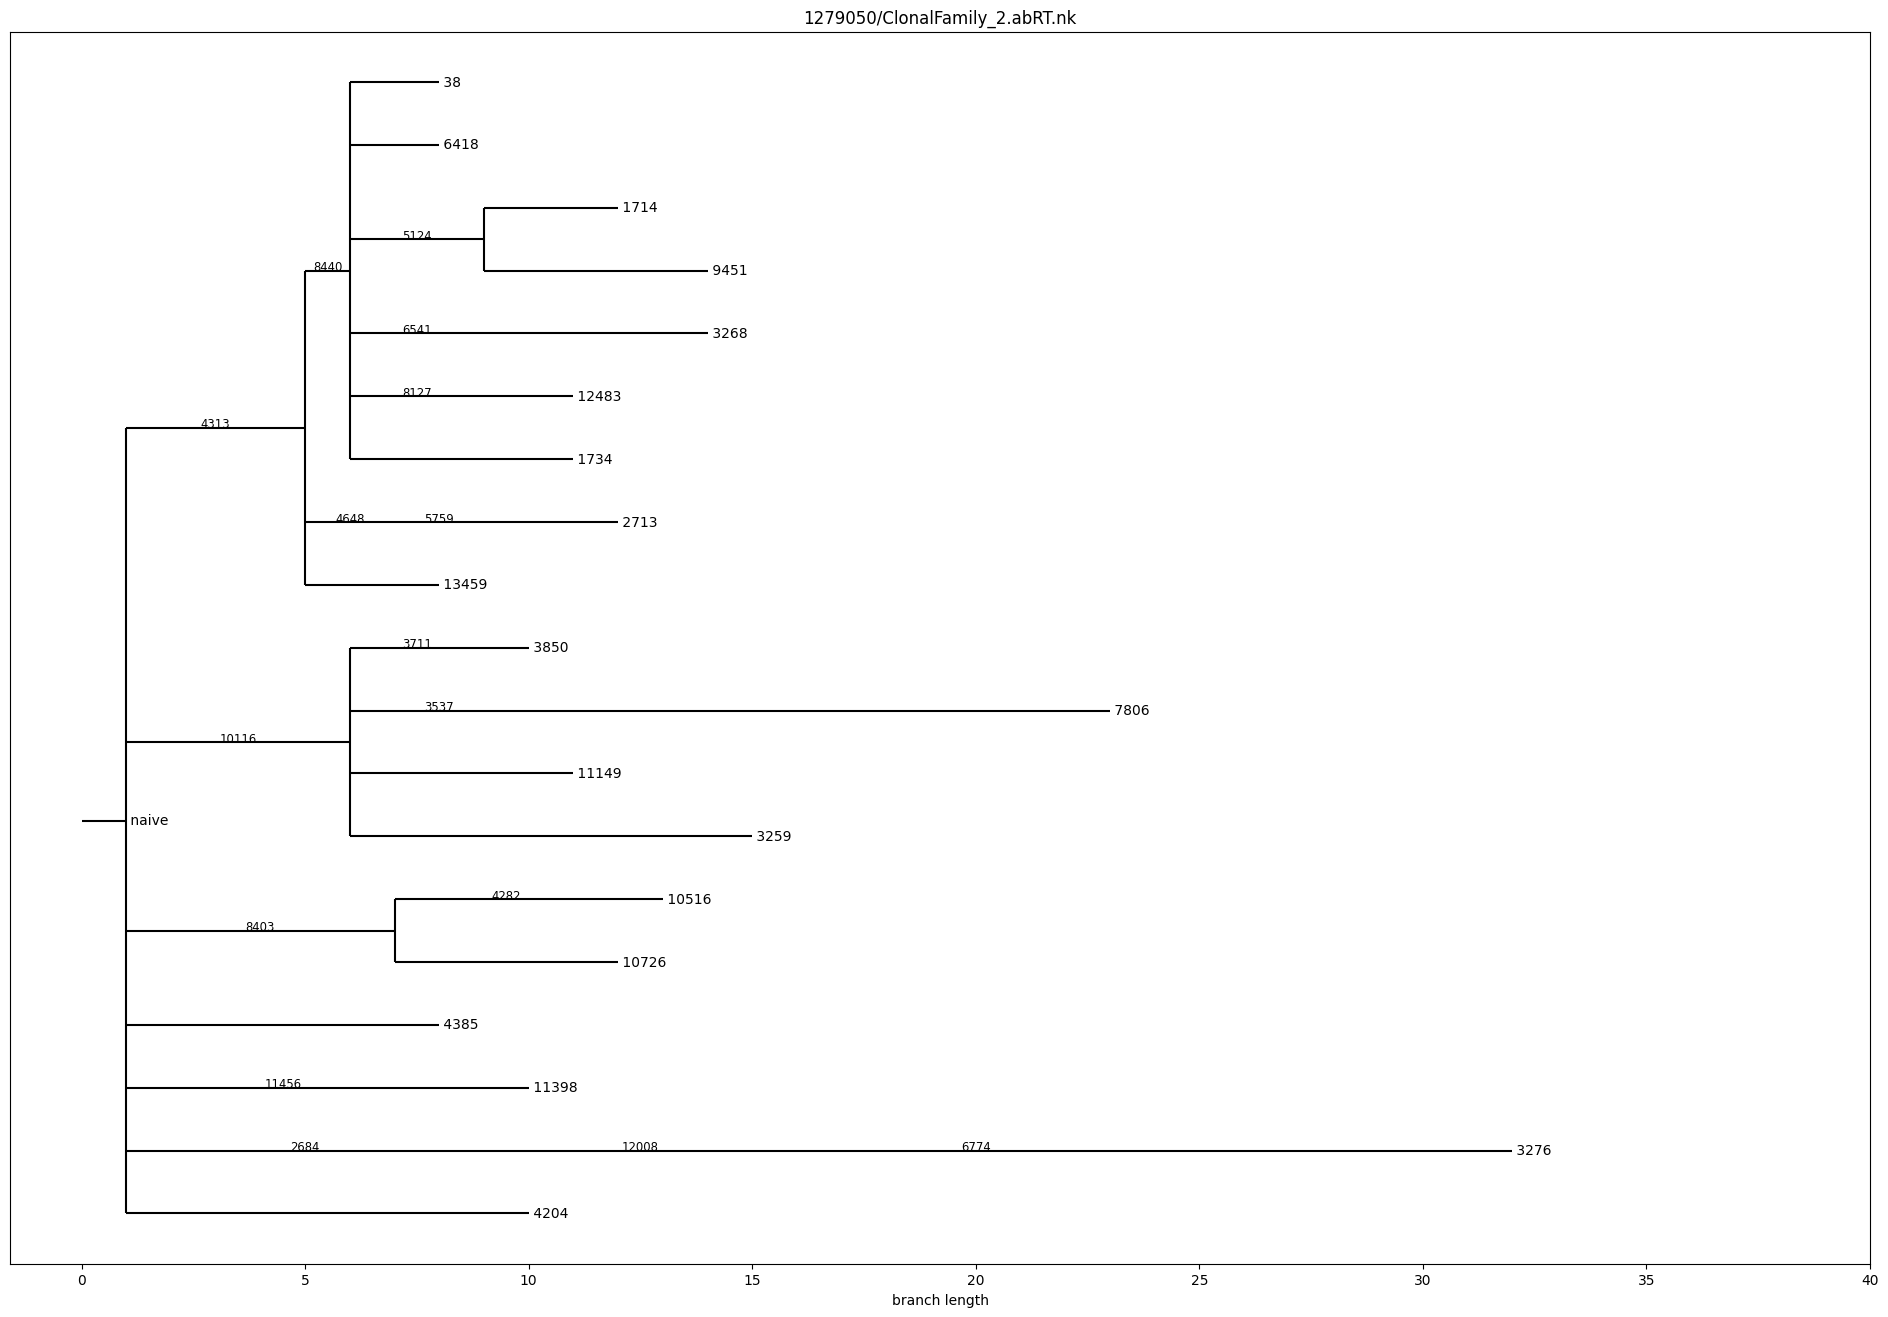

ClonalFamily_6.abRT.nk.csv
ClonalFamily_4.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_4.abRT.nk.png


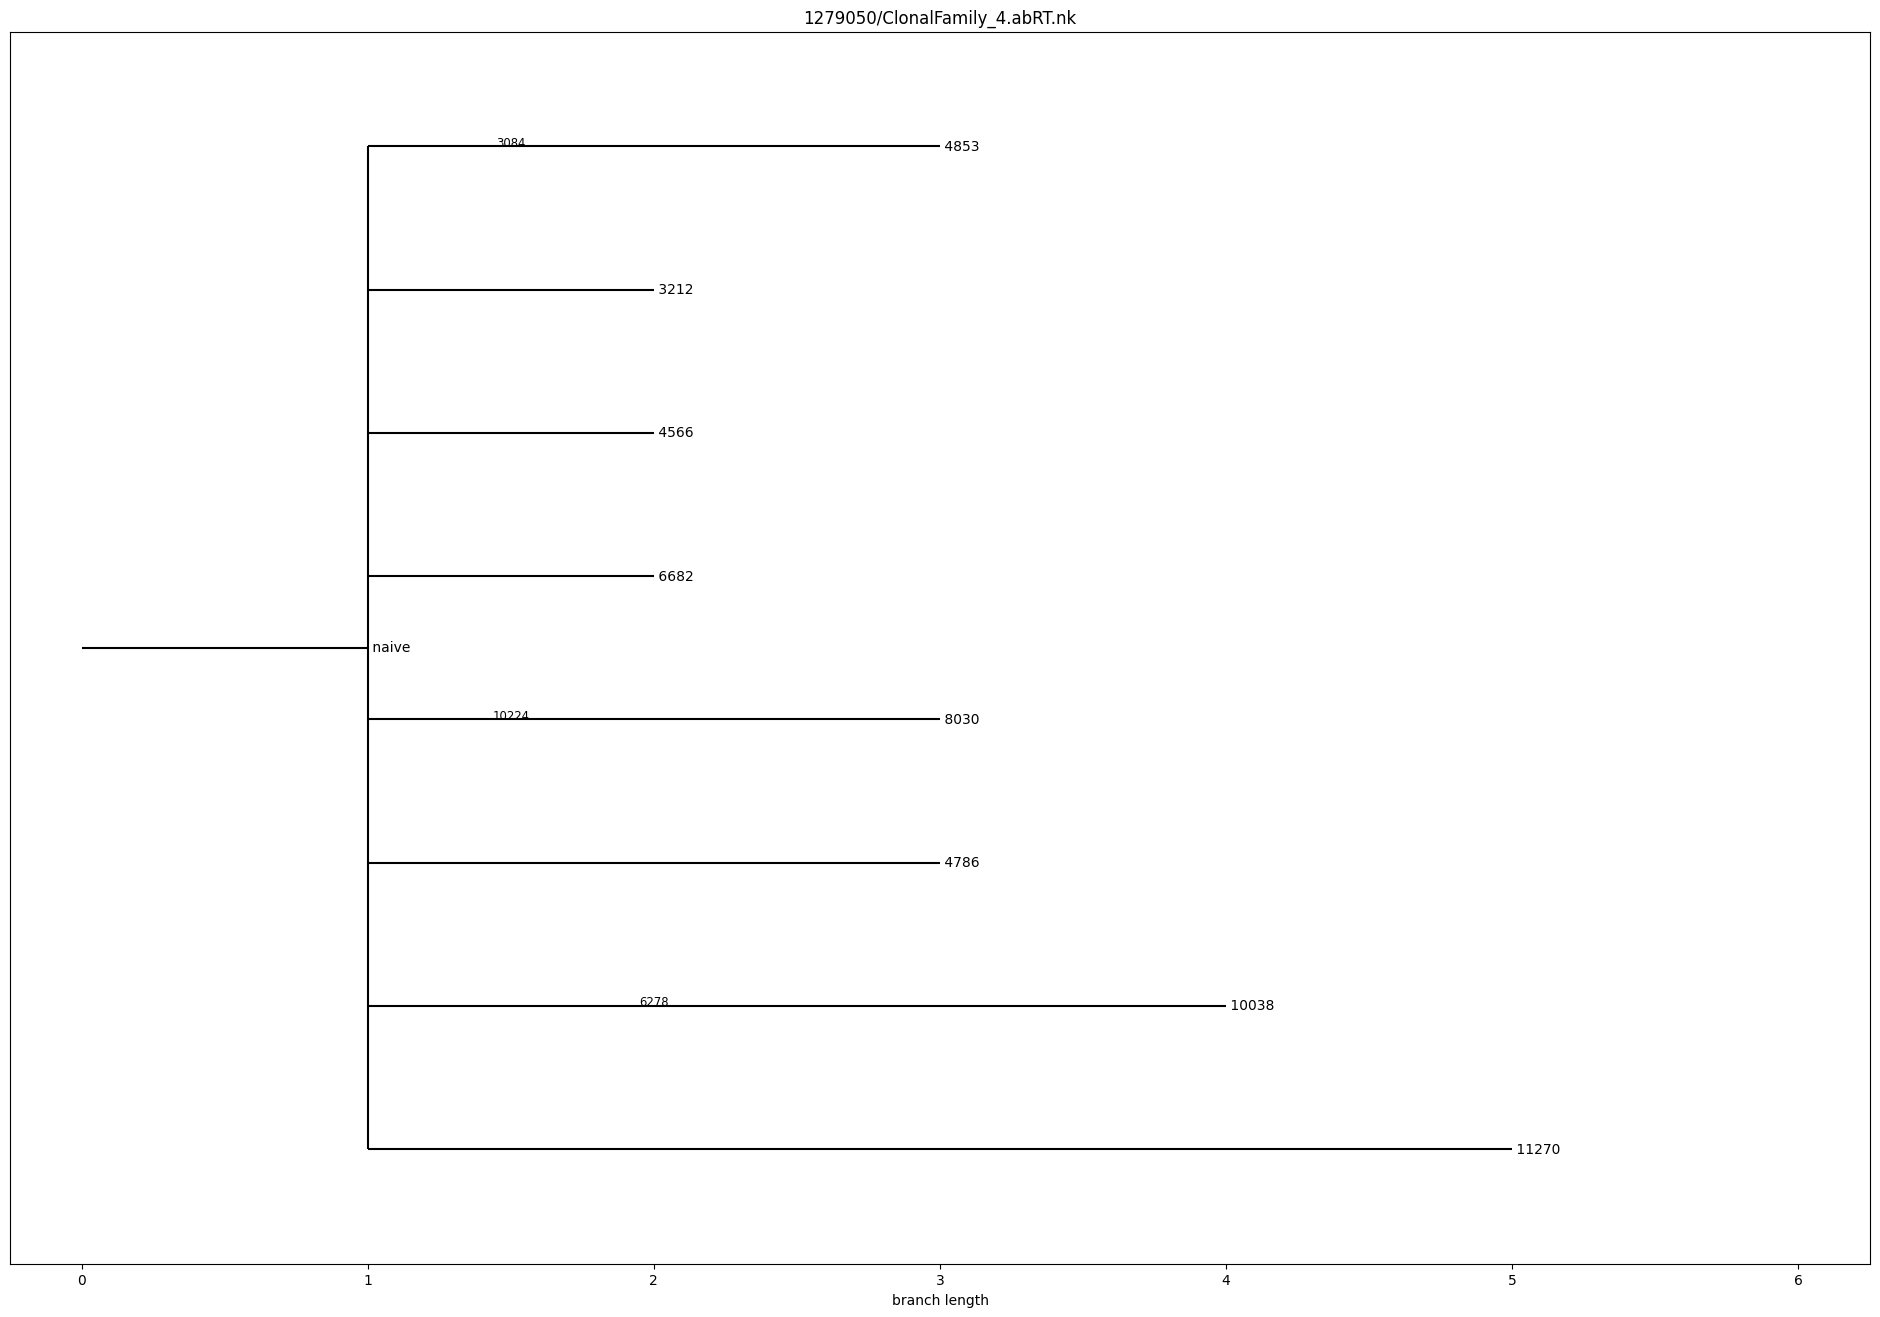

ClonalFamily_1.abRT.nk.csv
ClonalFamily_1.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_1.abRT.nk.png


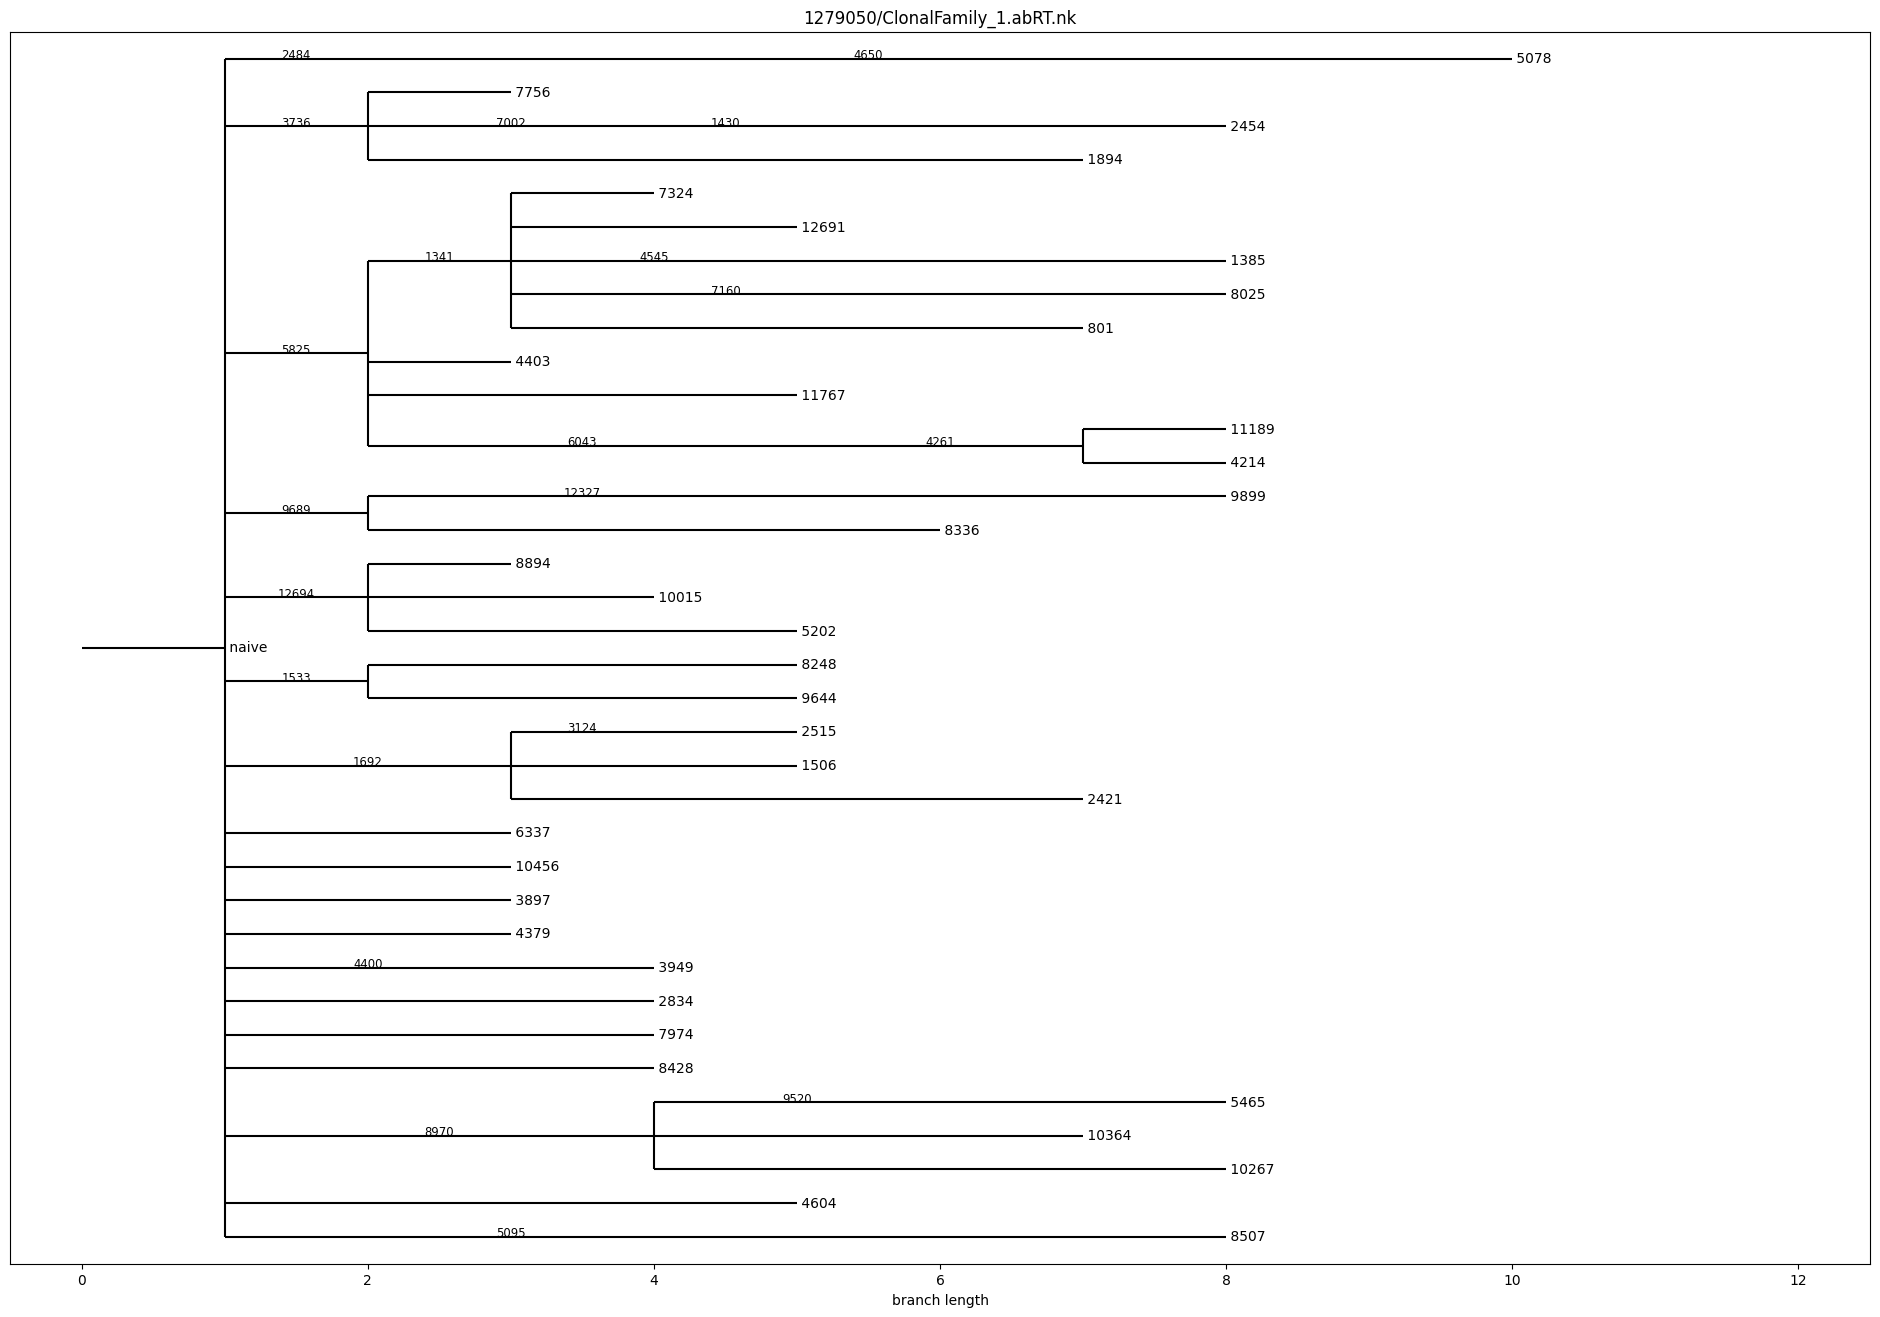

ClonalFamily_8.abRT.nk.csv
ClonalFamily_4.abRT.nk.csv
ClonalFamily_7.abRT.nk
Tree plot saved to /home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots/1279050/1279050_ClonalFamily_7.abRT.nk.png


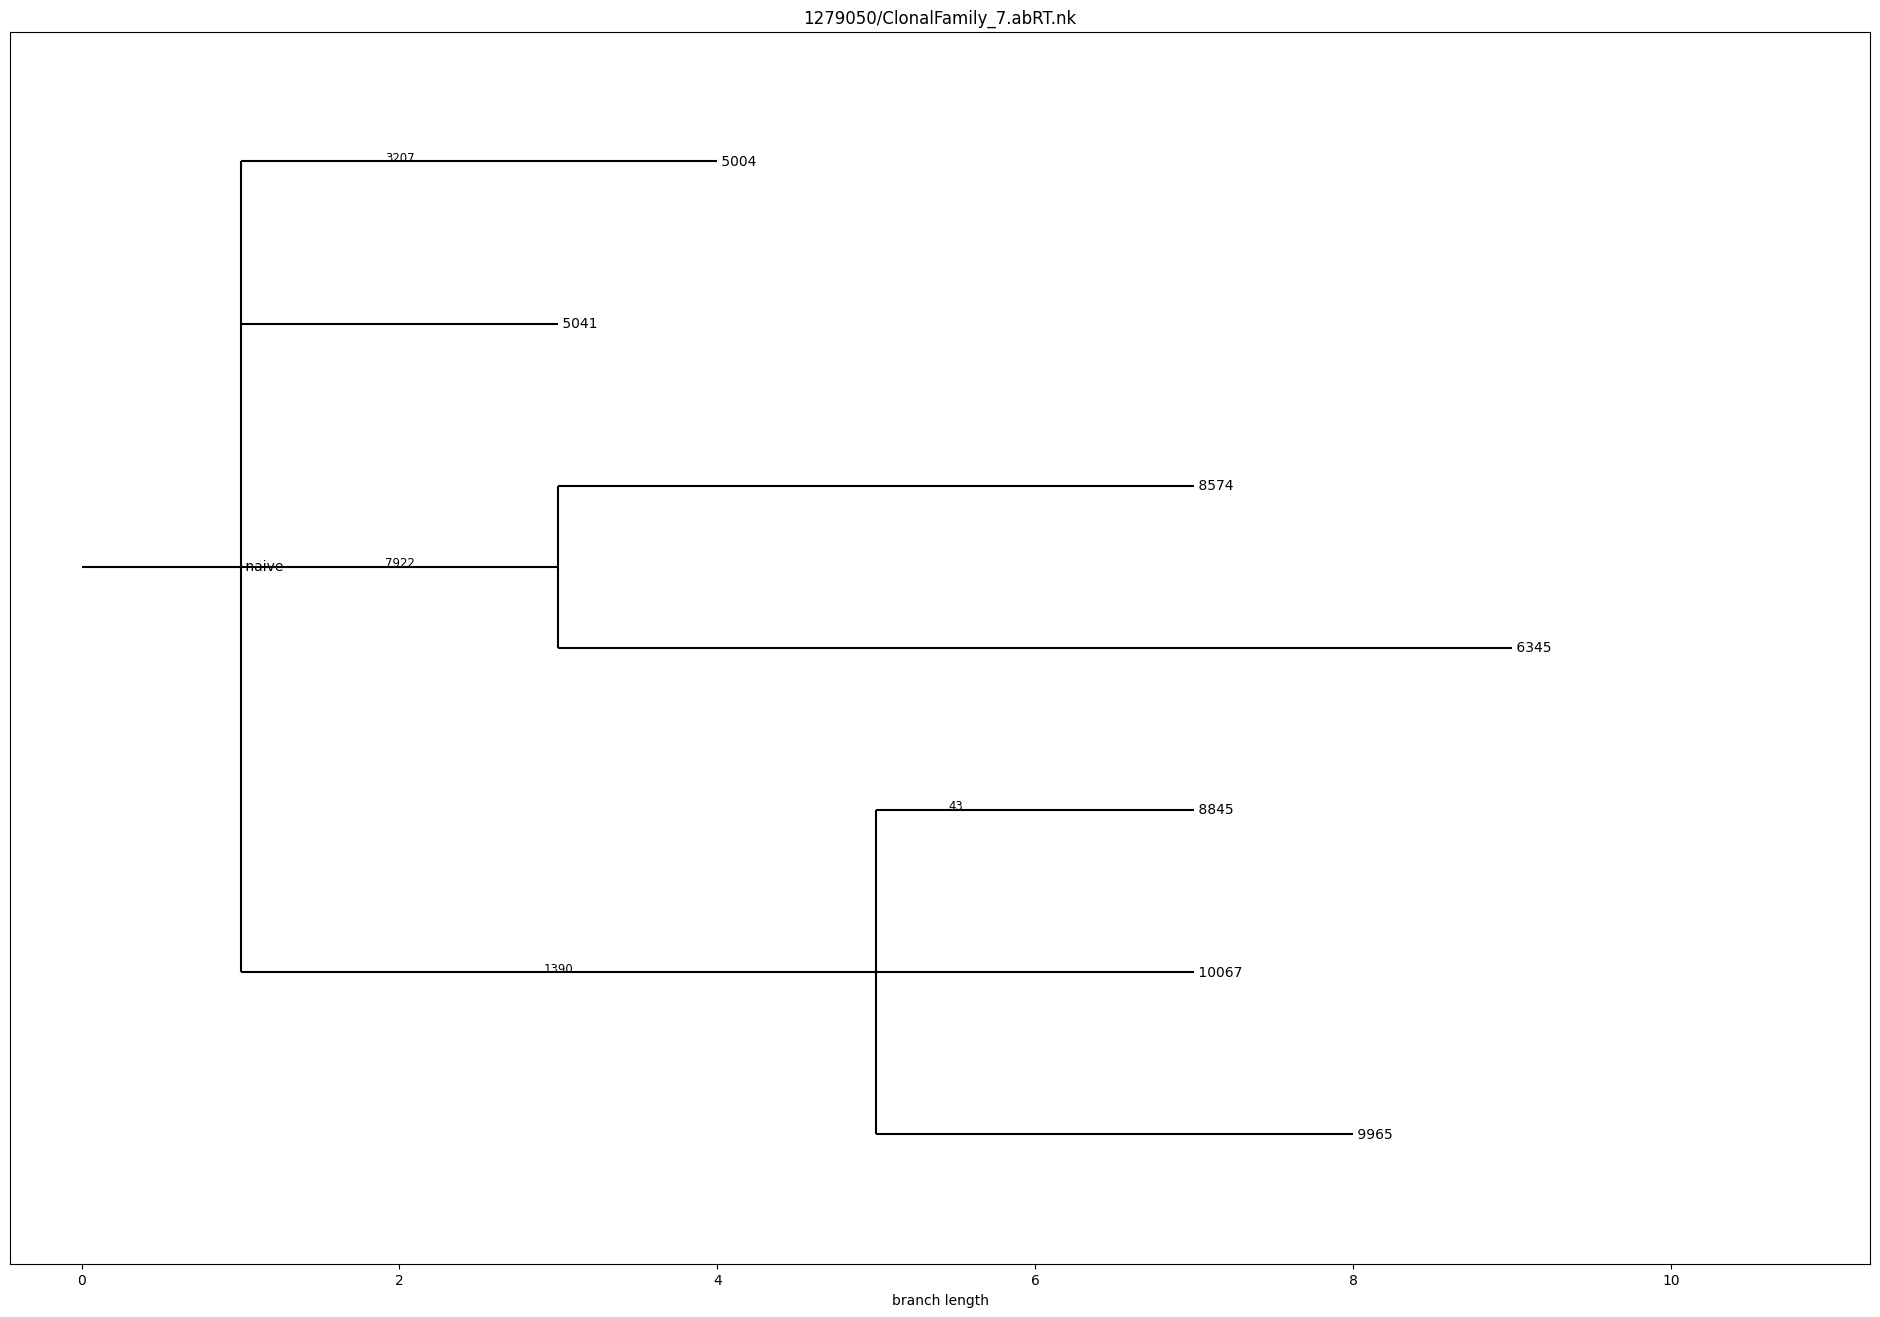

In [11]:
def process_all_newick_files_from_dir(run_dir, run_name):
    """
    Process all .nk files in the subdirectories of a base directory.
    
    Args:
        run_dir (str): Path to the run directory containing the .nk files for the run
        output_base_dir (str): Path to the base directory where plots will be saved.
        max_num (int): Number of directories to parse
    
    Returns:
        None
    """
    try:
        # Iterate through each file of the run_dir
        for file in os.listdir(run_dir):
            print(file)
            if file.endswith(".nk"):
                # Construct the corresponding output directory
                output_dir = os.path.join("/home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/tree_plots", run_name)
                
                input_file_path = os.path.join(run_dir, file)

                # Call the plot function
                plot_newick_tree_from_file(input_file_path, output_dir)
    
    except Exception as e:
        print(f"An error occurred while processing files: {e}")

# Example usage
run_dir = '/home/cameronhu/lineage_tree/clonalTree_Docker/tree_tests/runs/1279050'
run_name = '1279050'
process_all_newick_files_from_dir(run_dir, run_name)


# ete3

In [1]:
import os
from ete3 import Tree, TreeStyle
from IPython.display import Image

In [ ]:
%%bash
# One time download of ClonalTree outputs from GCS
# gsutil -m cp -r gs://proevo-ab/lineages/clonalTree/output/runs tree_tests/


In [ ]:
# newick_str = "(((A:1,B:1):2,C:3):4,D:5);"
# tree = Tree(newick_str, format=1)

# # Define TreeStyle
# ts = TreeStyle()
# ts.show_leaf_name = True
# ts.show_scale = True

# # # Render the tree
# output_file = "tree.png"
# tree.render(output_file, tree_style=ts)

# # # Display the image in Jupyter
# # Image(output_file)

: 

In [ ]:
# def plot_newick_tree(file_path):
#     """
#     Plot a Newick tree using the ete3 library.

#     Args:
#         file_path (str): Path to the Newick file.
#     """
#     try:
#         # Load the tree from the Newick file
#         with open(file_path, 'r') as file:
#             newick_str = file.read().strip()
        
#         # Create a tree object from the Newick string
#         tree = Tree(newick_str, format=1)
        
#         # Customize the tree style
#         ts = TreeStyle()
#         ts.show_leaf_name = True
#         ts.scale = 20  # Adjust scale if needed
#         ts.show_scale = True  # Show scale bar
        
#         # Render the tree
#         tree.show(tree_style=ts)

#     except Exception as e:
#         print(f"An error occurred: {e}")